In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

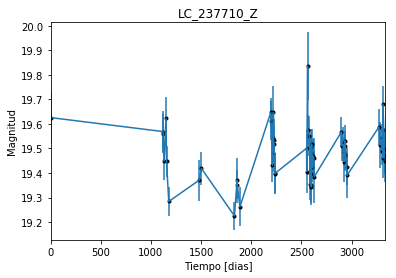

In [2]:
data = np.genfromtxt('LC_237710_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_237710_Z')
plt.savefig("LC_237710_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

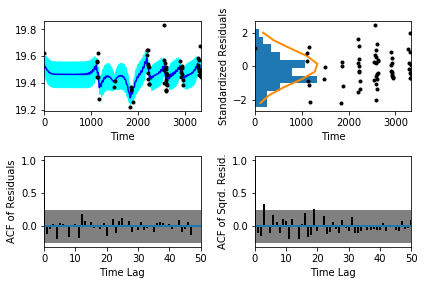

In [5]:
sample.assess_fit()

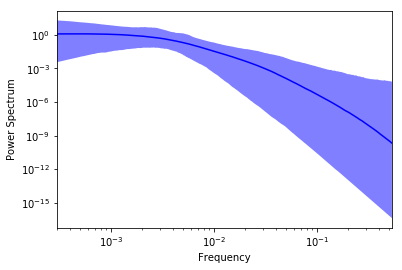

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

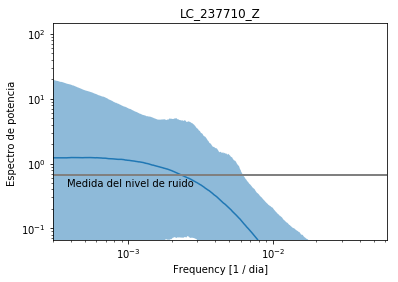

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_237710_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_237710_Z')

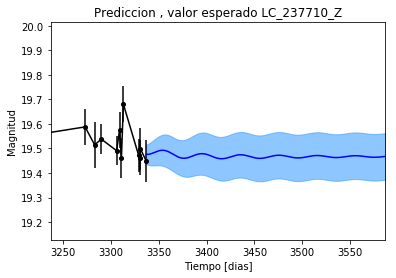

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_237710_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_237710_Z')

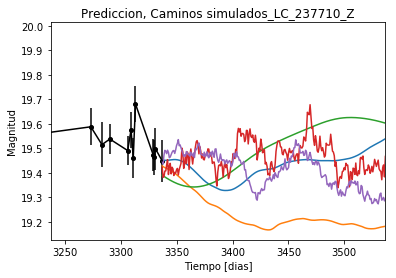

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_237710_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


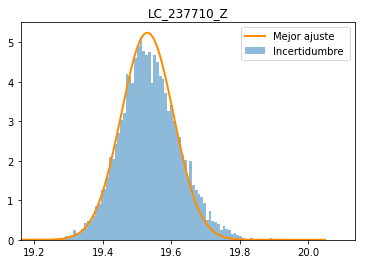

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_237710_Z')
plt.savefig("Mejor_ajuste_LC_237710_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_237710_Z')

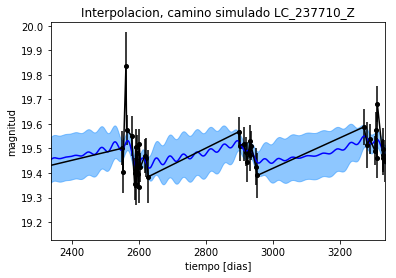

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_237710_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_237710_Z')

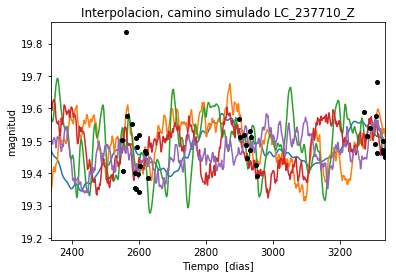

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_237710_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 689.878745843
Median: 0.0129186374938
Standard deviation: 0.203976838494
68% credibility interval: [ 0.0011642  0.1998199]
95% credibility interval: [  3.88501249e-04   8.02693093e-01]
99% credibility interval: [  3.16232413e-04   9.95452185e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 672.286979746
Median: 0.00626687263049
Standard deviation: 0.114422865822
68% credibility interval: [ 0.00089429  0.06040997]
95% credibility interval: [  3.74431447e-04   4.24677641e-01]
99% credibility interval: [  3.16223190e-04   8.34257811e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1435.98442841
Median: 0.0254653033294
St

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1468.54140907
Median: 88.7141289059
Standard deviation: 1.67618640487
68% credibility interval: [ 86.8389131   89.94663976]
95% credibility interval: [ 84.20679836  90.60869627]
99% credibility interval: [ 82.13978556  90.89633378]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 613.970930709
Median: 0.793243573949
Standard deviation: 2.37421923977
68% credibility interval: [ 0.07097502  4.34815885]
95% credibility interval: [ 0.01543193  8.16289704]
99% credibility interval: [  9.75671445e-03   1.09666679e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 627.03939696
Median: 0.986991523248
Standard deviation: 10.9130248419
68% credibility interval: [  0.03907937  13.95409264]
95% credibility interval: [  2.

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 0.0
Median: 1.01728884696e-29
Standard deviation: 7.86313742799e+151
68% credibility interval: [  1.53976141e-67   5.45641245e-04]
95% credibility interval: [  1.70580291e-173   9.06535502e+118]
99% credibility interval: [  1.53558274e-185   2.33748042e+152]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2410.02932894
Median: 19.4614340125
Standard deviation: 0.047279482661
68% credibility interval: [ 19.42349045  19.50201416]
95% credibility interval: [ 19.37280209  19.56328496]
99% credibility interval: [ 19.31960278  19.63143292]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 1225.65296495
Median: 0.0462166720755
Standard deviation: 0.277470736356
68% credibility interval: [ 0.          0.49977293]
95% credibility interval: [ 0.          0.96255084]
99% credibility interval: [ 0.          1.04173912]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 1225.65296495
Median: 0.0462166720755
Standard deviation: 0.277470736356
68% credibility interval: [ 0.          0.49977293]
95% credibility interval: [ 0.          0.96255084]
99% credibility interval: [ 0.          1.04173912]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 3112.34938767
Median: 0.0
Standard deviation: 0.00915942156931
68% cre

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1468.54140907
Median: 88.7141289059
Standard deviation: 1.67618640487
68% credibility interval: [ 86.8389131   89.94663976]
95% credibility interval: [ 84.20679836  90.60869627]
99% credibility interval: [ 82.13978556  90.89633378]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2874.13830766
Median: 0.0111906442682
Standard deviation: 0.0135380308939
68% credibility interval: [ 0.00600949  0.02200287]
95% credibility interval: [ 0.00317814  0.04715864]
99% credibility interval: [ 0.00191508  0.08454278]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2756.56072591
Median: 0.988731671124
Standard deviation: 0.163435281016
68% credibility interval: [ 0.84625883  1.1631285 ]
95% credibility interval: [ 0.72818804  1.36340664]
99% credibility interval: [ 0.65653107  1.53484712]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 512.847578888
Median: 0.00060286631599
Standard deviation: 0.257108151348
68% credibility interval: [  1.25656272e-06   2.95920546e-02]
95% credibility interval: [  9.38045916e-122   5.91101906e-001]
99% credibility interval: [  1.19037053e-153   1.85841558e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 689.878745843
Median: (-0.0811701932901-0.767859642004j)
Standard deviation: 2.16379401262
68% credibility interval: [-1.25550547-5.99811432j -0.00731486-2.28447748j]
95% credibility interval: [ -5.04346945e+00-5.45103487j  -2.44102534e-03-5.42061819j]
99% credibility interval: [ -6.25461054e+00-3.55835042j  -1.98694685e-03-0.14201719j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 672.286979746
Median: (-0.0393759220338+0.302366587507j)
Standard deviation: 1.88582039734
68% credibility interval: [-0.37956706+0.74834717j -0.00561897+0.98273709j]
95% credibility interval: [ -2.66832832e+00+6.53440887j  -2.35262216e-03+0.26770634j]
99% credibility interval: [ -5.24179642e+00+2.36802667j  -1.98688890e-03+0.14141248j]
Po